In [16]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from multiprocessing import Pool

from keras.models import Model
from keras.optimizers import Adam
from keras.models import load_model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Input, LSTM, BatchNormalization, Dropout, Dense, Add, Flatten

from tensorflow.keras.regularizers import l2

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

## System Calls List

In [2]:
syscalls = [
"sys_enter_llistxattr",
"sys_enter_setgroups",
"sys_enter_lremovexattr",
"sys_enter_sethostname",
"sys_enter_accept",
"sys_enter_lseek",
"sys_enter_setitimer",
"sys_enter_accept4",
"sys_enter_lsetxattr",
"sys_enter_setns",
"sys_enter_acct",
"sys_enter_madvise",
"sys_enter_setpgid",
"sys_enter_add_key",
"sys_enter_mbind",
"sys_enter_setpriority",
"sys_enter_adjtimex",
"sys_enter_membarrier",
"sys_enter_setregid",
"sys_enter_personality",
"sys_enter_memfd_create",
"sys_enter_setresgid",
"sys_enter_bind",
"sys_enter_memfd_secret",
"sys_enter_setresuid",
"sys_enter_bpf",
"sys_enter_migrate_pages",
"sys_enter_setreuid",
"sys_enter_brk",
"sys_enter_mincore",
"sys_enter_setrlimit",
"sys_enter_capget",
"sys_enter_mkdirat",
"sys_enter_setsid",
"sys_enter_capset",
"sys_enter_mknodat",
"sys_enter_setsockopt",
"sys_enter_chdir",
"sys_enter_mlock",
"sys_enter_settimeofday",
"sys_enter_chroot",
"sys_enter_mlock2",
"sys_enter_setuid",
"sys_enter_clock_adjtime",
"sys_enter_mlockall",
"sys_enter_setxattr",
"sys_enter_clock_getres",
"sys_enter_mmap",
"sys_enter_shmat",
"sys_enter_clock_gettime",
"sys_enter_mount",
"sys_enter_shmctl",
"sys_enter_clock_nanosleep",
"sys_enter_mount_setattr",
"sys_enter_shmdt",
"sys_enter_clock_settime",
"sys_enter_move_mount",
"sys_enter_shmget",
"sys_enter_clone",
"sys_enter_move_pages",
"sys_enter_shutdown",
"sys_enter_clone3",
"sys_enter_mprotect",
"sys_enter_sigaltstack",
"sys_enter_close",
"sys_enter_mq_getsetattr",
"sys_enter_signalfd4",
"sys_enter_close_range",
"sys_enter_mq_notify",
"sys_enter_socket",
"sys_enter_connect",
"sys_enter_mq_open",
"sys_enter_socketpair",
"sys_enter_copy_file_range",
"sys_enter_mq_timedreceive",
"sys_enter_splice",
"sys_enter_delete_module",
"sys_enter_mq_timedsend",
"sys_enter_statfs",
"sys_enter_dup",
"sys_enter_mq_unlink",
"sys_enter_statx",
"sys_enter_dup3",
"sys_enter_mremap",
"sys_enter_swapoff",
"sys_enter_epoll_create1",
"sys_enter_msgctl",
"sys_enter_swapon",
"sys_enter_epoll_ctl",
"sys_enter_msgget",
"sys_enter_symlinkat",
"sys_enter_epoll_pwait",
"sys_enter_msgrcv",
"sys_enter_sync",
"sys_enter_epoll_pwait2",
"sys_enter_msgsnd",
"sys_enter_sync_file_range",
"sys_enter_eventfd2",
"sys_enter_msync",
"sys_enter_syncfs",
"sys_enter_execve",
"sys_enter_munlock",
"sys_enter_sysinfo",
"sys_enter_execveat",
"sys_enter_munlockall",
"sys_enter_syslog",
"sys_enter_exit",
"sys_enter_munmap",
"sys_enter_tee",
"sys_enter_exit_group",
"sys_enter_name_to_handle_at",
"sys_enter_tgkill",
"sys_enter_faccessat",
"sys_enter_nanosleep",
"sys_enter_timer_create",
"sys_enter_faccessat2",
"sys_enter_newfstat",
"sys_enter_timer_delete",
"sys_enter_fadvise64",
"sys_enter_newfstatat",
"sys_enter_timer_getoverrun",
"sys_enter_fallocate",
"sys_enter_newuname",
"sys_enter_timer_gettime",
"sys_enter_fanotify_init",
"sys_enter_open_by_handle_at",
"sys_enter_timer_settime",
"sys_enter_fanotify_mark",
"sys_enter_open_tree",
"sys_enter_timerfd_create",
"sys_enter_fchdir",
"sys_enter_openat",
"sys_enter_timerfd_gettime",
"sys_enter_fchmod",
"sys_enter_openat2",
"sys_enter_timerfd_settime",
"sys_enter_fchmodat",
"sys_enter_perf_event_open",
"sys_enter_times",
"sys_enter_fchown",
"sys_enter_pidfd_getfd",
"sys_enter_tkill",
"sys_enter_fchownat",
"sys_enter_pidfd_open",
"sys_enter_truncate",
"sys_enter_fcntl",
"sys_enter_pidfd_send_signal",
"sys_enter_umask",
"sys_enter_fdatasync",
"sys_enter_pipe2",
"sys_enter_umount",
"sys_enter_fgetxattr",
"sys_enter_pivot_root",
"sys_enter_unlinkat",
"sys_enter_finit_module",
"sys_enter_ppoll",
"sys_enter_unshare",
"sys_enter_flistxattr",
"sys_enter_prctl",
"sys_enter_userfaultfd",
"sys_enter_flock",
"sys_enter_pread64",
"sys_enter_utimensat",
"sys_enter_fremovexattr",
"sys_enter_preadv",
"sys_enter_vhangup",
"sys_enter_fsconfig",
"sys_enter_preadv2",
"sys_enter_vmsplice",
"sys_enter_fsetxattr",
"sys_enter_prlimit64",
"sys_enter_wait4",
"sys_enter_fsmount",
"sys_enter_process_madvise",
"sys_enter_waitid",
"sys_enter_fsopen",
"sys_enter_process_mrelease",
"sys_enter_write",
"sys_enter_fspick",
"sys_enter_process_vm_readv",
"sys_enter_writev",
"sys_enter_fstatfs",
"sys_enter_process_vm_writev",
"sys_enter_fsync",
"sys_enter_pselect6",
"sys_enter_ftruncate",
"sys_enter_ptrace",
"sys_enter_futex",
"sys_enter_pwrite64",
"sys_enter_get_mempolicy",
"sys_enter_pwritev",
"sys_enter_get_robust_list",
"sys_enter_pwritev2",
"sys_enter_getcpu",
"sys_enter_quotactl",
"sys_enter_getcwd",
"sys_enter_quotactl_fd",
"sys_enter_getdents64",
"sys_enter_read",
"sys_enter_getegid",
"sys_enter_readahead",
"sys_enter_geteuid",
"sys_enter_readlinkat",
"sys_enter_getgid",
"sys_enter_readv",
"sys_enter_getgroups",
"sys_enter_reboot",
"sys_enter_getitimer",
"sys_enter_recvfrom",
"sys_enter_getpeername",
"sys_enter_recvmmsg",
"sys_enter_getpgid",
"sys_enter_recvmsg",
"sys_enter_getpid",
"sys_enter_remap_file_pages",
"sys_enter_getppid",
"sys_enter_removexattr",
"sys_enter_getpriority",
"sys_enter_renameat",
"sys_enter_getrandom",
"sys_enter_renameat2",
"sys_enter_getresgid",
"sys_enter_request_key",
"sys_enter_getresuid",
"sys_enter_restart_syscall",
"sys_enter_getrlimit",
"sys_enter_rseq",
"sys_enter_getrusage",
"sys_enter_rt_sigaction",
"sys_enter_getsid",
"sys_enter_rt_sigpending",
"sys_enter_getsockname",
"sys_enter_rt_sigprocmask",
"sys_enter_getsockopt",
"sys_enter_rt_sigqueueinfo",
"sys_enter_gettid",
"sys_enter_rt_sigreturn",
"sys_enter_gettimeofday",
"sys_enter_rt_sigsuspend",
"sys_enter_getuid",
"sys_enter_rt_sigtimedwait",
"sys_enter_getxattr",
"sys_enter_rt_tgsigqueueinfo",
"sys_enter_init_module",
"sys_enter_sched_get_priority_max",
"sys_enter_inotify_add_watch",
"sys_enter_sched_get_priority_min",
"sys_enter_inotify_init1",
"sys_enter_sched_getaffinity",
"sys_enter_inotify_rm_watch",
"sys_enter_sched_getattr",
"sys_enter_io_cancel",
"sys_enter_sched_getparam",
"sys_enter_io_destroy",
"sys_enter_sched_getscheduler",
"sys_enter_io_getevents",
"sys_enter_sched_rr_get_interval",
"sys_enter_io_pgetevents",
"sys_enter_sched_setaffinity",
"sys_enter_io_setup",
"sys_enter_sched_setattr",
"sys_enter_io_submit",
"sys_enter_sched_setparam",
"sys_enter_io_uring_enter",
"sys_enter_sched_setscheduler",
"sys_enter_io_uring_register",
"sys_enter_sched_yield",
"sys_enter_io_uring_setup",
"sys_enter_seccomp",
"sys_enter_ioctl",
"sys_enter_semctl",
"sys_enter_ioprio_get",
"sys_enter_semget",
"sys_enter_ioprio_set",
"sys_enter_semop",
"sys_enter_kcmp",
"sys_enter_semtimedop",
"sys_enter_kexec_file_load",
"sys_enter_sendfile64",
"sys_enter_kexec_load",
"sys_enter_sendmmsg",
"sys_enter_keyctl",
"sys_enter_sendmsg",
"sys_enter_kill",
"sys_enter_sendto",
"sys_enter_landlock_add_rule",
"sys_enter_set_mempolicy",
"sys_enter_landlock_create_ruleset",
"sys_enter_set_robust_list",
"sys_enter_landlock_restrict_self",
"sys_enter_set_tid_address",
"sys_enter_lgetxattr",
"sys_enter_setdomainname",
"sys_enter_linkat",
"sys_enter_setfsgid",
"sys_enter_listen",
"sys_enter_setfsuid",
"sys_enter_listxattr",
"sys_enter_setgid"
]

## Loading CSV from Desktop

In [3]:
NUM_CLASSES = 3
CLASSES = np.array(['benign', 'sysrv', 'xmrig'])
DATASET_DIR = "dataset/"
VECTOR_LENGTH = 32 * 32

label_encoder = LabelEncoder()
label_encoder.fit(syscalls)

def csvToVector(file_path):
    data = pd.read_csv(file_path)
    data_encoded = label_encoder.fit_transform(data['SYSTEM_CALL'])
    vector = np.zeros(VECTOR_LENGTH, dtype=np.uint8)
    syscall_nums = min(len(data_encoded), VECTOR_LENGTH)
    vector[:syscall_nums] = data_encoded[:syscall_nums]

    return vector

def process_file(args):
    file_path, class_idx = args
    vector = csvToVector(file_path)
    return vector, class_idx

def load_data(dataset_dir):
    x = []
    y = []
    classes = ["0", "1", "2"]

    file_paths = []
    for class_idx, class_name in enumerate(classes):
        class_dir = os.path.join(dataset_dir, class_name)
        for file_name in os.listdir(class_dir):
            if file_name.endswith('.csv'):
                file_path = os.path.join(class_dir, file_name)
                file_paths.append((file_path, class_idx))

    with Pool() as pool:
        results = pool.map(process_file, file_paths)

    x, y = zip(*results)
    x = np.array(x)
    y = np.array(y)

    return x, y

In [4]:
X, y = load_data(DATASET_DIR)

## Train, Validation, Test Split and Nomalize

In [5]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train = X_train / 299.0
X_val = X_val / 299.0
X_test = X_test / 299.0

y_train = to_categorical(y_train, 3)
y_val = to_categorical(y_val, 3)
y_test = to_categorical(y_test, 3)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(1359, 1024)
(729, 1024)
(340, 1024)
(1359, 3)
(729, 3)
(340, 3)


## LSTM model

In [17]:
input_layer = Input(shape=(VECTOR_LENGTH, 1))

x = LSTM(32, return_sequences=True)(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = LSTM(64, return_sequences=True)(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = LSTM(128, return_sequences=False)(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Flatten()(x)

x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

output_layer = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1024, 1)]         0         
                                                                 
 lstm_12 (LSTM)              (None, 1024, 32)          4352      
                                                                 
 batch_normalization_13 (Ba  (None, 1024, 32)          128       
 tchNormalization)                                               
                                                                 
 dropout_8 (Dropout)         (None, 1024, 32)          0         
                                                                 
 lstm_13 (LSTM)              (None, 1024, 64)          24832     
                                                                 
 batch_normalization_14 (Ba  (None, 1024, 64)          256       
 tchNormalization)                                         

## Check Point

In [19]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)
checkpoint = ModelCheckpoint(
    filepath='/tmp/LSTM_checkpoint.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1
)

## Model Training

In [20]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[reduce_lr, checkpoint])

Epoch 1/50
43/43 [==============================] - ETA: 0s - loss: 2.7271 - accuracy: 0.6505
Epoch 1: val_accuracy improved from -inf to 0.48529, saving model to /tmp/checkpoint.h5
43/43 [==============================] - 12s 143ms/step - loss: 2.7271 - accuracy: 0.6505 - val_loss: 2.5172 - val_accuracy: 0.4853 - lr: 0.0010
Epoch 2/50
 1/43 [..............................] - ETA: 4s - loss: 2.2056 - accuracy: 0.7188

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


43/43 [==============================] - ETA: 0s - loss: 2.4021 - accuracy: 0.7071
Epoch 2: val_accuracy did not improve from 0.48529
43/43 [==============================] - 5s 106ms/step - loss: 2.4021 - accuracy: 0.7071 - val_loss: 2.3493 - val_accuracy: 0.4176 - lr: 0.0010
Epoch 3/50
43/43 [==============================] - ETA: 0s - loss: 2.0785 - accuracy: 0.7432
Epoch 3: val_accuracy did not improve from 0.48529
43/43 [==============================] - 5s 106ms/step - loss: 2.0785 - accuracy: 0.7432 - val_loss: 2.2124 - val_accuracy: 0.4176 - lr: 0.0010
Epoch 4/50
43/43 [==============================] - ETA: 0s - loss: 1.9696 - accuracy: 0.7366
Epoch 4: val_accuracy did not improve from 0.48529
43/43 [==============================] - 5s 106ms/step - loss: 1.9696 - accuracy: 0.7366 - val_loss: 2.0807 - val_accuracy: 0.4853 - lr: 0.0010
Epoch 5/50
43/43 [==============================] - ETA: 0s - loss: 1.8414 - accuracy: 0.7307
Epoch 5: val_accuracy did not improve from 0.48529

## Load best Checkpoint

In [21]:
cp_model = load_model('/tmp/LSTM_checkpoint.h5')
cp_model.evaluate(X_test, y_test, batch_size=1000)

1/1 [==============================] - 1s 1s/step - loss: 0.6863 - accuracy: 0.8381


[0.6863484978675842, 0.8381344079971313]

## Evaluate

In [22]:
y_pred = cp_model.predict(X_test)

23/23 [==============================] - 2s 38ms/step


In [23]:
preds_single = CLASSES[np.argmax(y_pred, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

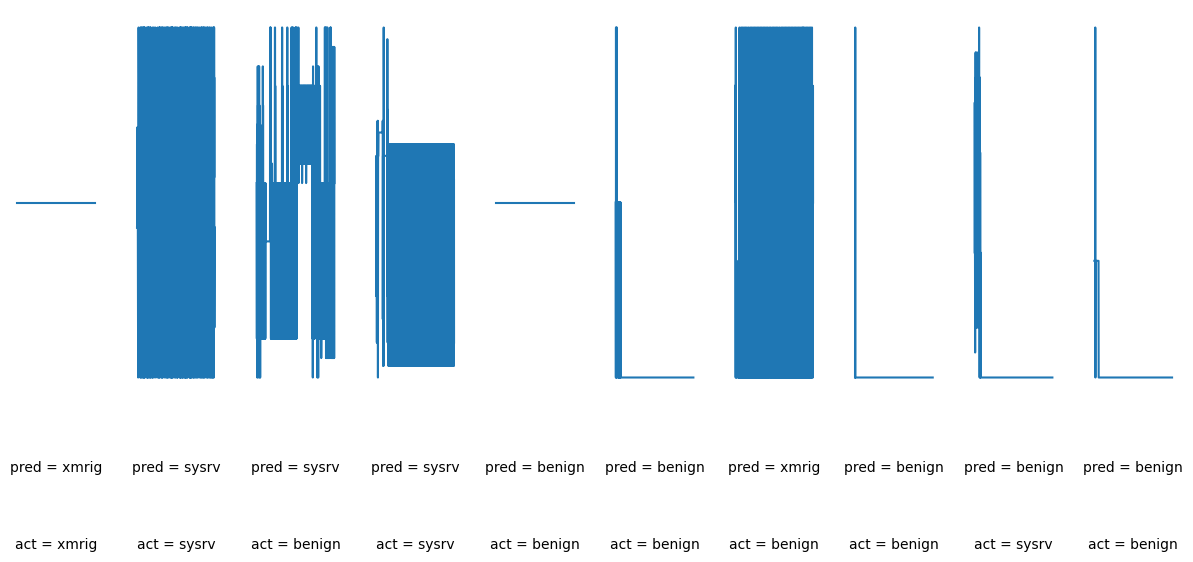

In [24]:
n_to_show = 10
indices = np.random.choice(range(len(X_test)), n_to_show)

fig = plt.figure(figsize=(15, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    data = X_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.plot(data)
    ax.axis('off')
    ax.text(0.5, -0.2, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.4, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)

plt.show()


In [25]:
y_pred_classes = tf.argmax(y_pred, axis=1)
y_test_classes = tf.argmax(y_test, axis=1)

print(classification_report(y_test_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86       376
           1       0.75      0.98      0.85       293
           2       0.77      0.50      0.61        60

    accuracy                           0.84       729
   macro avg       0.83      0.75      0.77       729
weighted avg       0.86      0.84      0.84       729



In [26]:
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

class_labels = ['Benign', 'Sysrv', 'Xmrig']

conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

print("Confusion Matrix:")
print(conf_matrix_df)

Confusion Matrix:
        Benign  Sysrv  Xmrig
Benign     293     74      9
Sysrv        5    288      0
Xmrig        8     22     30
